In [1]:
import json
from pathlib import Path
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import random
from preprocessing.law_reference_parser import parse_reference
from pprint import pprint

In [2]:
def flatten(xss):
    """Flattens a list of lists."""
    return [x for xs in xss for x in xs]

In [3]:
def load_all_decisions(data_dir="../data/raw") -> pd.DataFrame:
    base_path = Path(data_dir)
    records = []

    for json_file in tqdm(base_path.rglob("page*.json"), desc="Loading JSON files"):
        try:
            with open(json_file, "r", encoding="utf-8") as f:
                data = json.load(f)
            for item in data.get("items", []):
                records.append(item)
        except Exception as e:
            print(f"Failed to load {json_file}: {e}")

    df = pd.DataFrame(records)
    return df


In [4]:
df_decisions = load_all_decisions()

Loading JSON files: 5851it [00:03, 1686.42it/s]


In [5]:
df_decisions.head(10)

,jednaciCislo,soud,autor,ecli,predmetRizeni,datumVydani,datumZverejneni,klicovaSlova,zminenaUstanoveni,odkaz
0,11 C 76/2024-51,Obvodní soud pro Prahu 1,JUDr. Edita Votočková,ECLI:CZ:OSPH01:2024:11.C.76.2024.51,o zaplacení 100 000 Kč s příslušenstvím,2024-12-04,2025-04-26,"[smlouva příkazní, odstoupení od smlouvy]","[§ 2002 z. č. 89/2012 Sb., § 2430 z. č. 89/201...",https://rozhodnuti.justice.cz/api/finaldoc/978...
1,11 C 34/2024-52,Obvodní soud pro Prahu 1,JUDr. Edita Votočková,ECLI:CZ:OSPH01:2024:11.C.34.2024.52,o zaplacení 202 500 Kč,2024-08-30,2025-04-26,"[daňové řízení, nemajetková újma, náhrada nema...","[§ 13 z. č. 82/1998 Sb., § 31a z. č. 82/1998 S...",https://rozhodnuti.justice.cz/api/finaldoc/30f...
2,39 Co 473/2024-79,Městský soud v Praze,JUDr. Jiří Cidlina,ECLI:CZ:MSPH:2025:39.Co.473.2024.79,"o zaplacení 202 500 Kč s příslušenstvím, k odv...",2025-01-08,2025-04-26,"[zadostiučinění / satisfakce, podvod, nemajetk...","[§ 1 vyhl. č. 254/2015 Sb., § 2 vyhl. č. 254/2...",https://rozhodnuti.justice.cz/api/finaldoc/623...
3,17 C 31/2025-31,Obvodní soud pro Prahu 3,"JUDr. Markéta Písaříková, Ph.D.",ECLI:CZ:OSPH03:2025:17.C.31.2025.1,o 11 220 Kč s příslušenstvím,2025-03-14,2025-04-26,[pojištění odpovědnosti za škodu],"[§ 6 vyhl. č. 177/1996 Sb., § 14b vyhl. č. 177...",https://rozhodnuti.justice.cz/api/finaldoc/95c...
4,14 C 6/2025-19,Okresní soud v Příbrami,JUDr. Josef Pelcner,ECLI:CZ:OSPB:2025:14.C.6.2025.1,zaplacení 12 585 Kč s příslušenstvím,2025-01-22,2025-04-09,[peněžité plnění],"[§ 142 z. č. 99/1963 Sb., § 1 z. č. 168/1999 S...",https://rozhodnuti.justice.cz/api/finaldoc/a04...
5,62 C 457/2024-17,Okresní soud v Ostravě,Mgr. Radana Vilčová,ECLI:CZ:OSOV:2025:62.C.457.2024.1,o zaplacení 18 985 Kč s příslušenstvím,2025-02-11,2025-04-09,[dodávky energie],"[§ 1 vyhl. č. 254/2015 Sb., § 2 vyhl. č. 254/2...",https://rozhodnuti.justice.cz/api/finaldoc/e41...
6,14 C 187/2024-30,Okresní soud v Příbrami,JUDr. Josef Pelcner,ECLI:CZ:OSPB:2024:14.C.187.2024.1,"zaplacení 17 828,01 Kč s příslušenstvím",2024-12-30,2025-04-09,[smlouva o úvěru],"[§ 160 z. č. 99/1963 Sb., § 2048 z. č. 89/2012...",https://rozhodnuti.justice.cz/api/finaldoc/fc3...
7,12 C 258/2024-30,Okresní soud ve Znojmě,JUDr. Dana Hamzová,ECLI:CZ:OSZN:2024:12.C.258.2024.1,"21 737,49 Kč s příslušenstvím",2024-12-05,2025-04-09,[dodávky energie],"[§ 6 vyhl. č. 177/1996 Sb., § 14b vyhl. č. 177...",https://rozhodnuti.justice.cz/api/finaldoc/0af...
8,14 C 186/2024-31,Okresní soud v Příbrami,JUDr. Josef Pelcner,ECLI:CZ:OSPB:2024:14.C.186.2024.1,"zaplacení 31 262,60 Kč s příslušenstvím",2024-12-30,2025-04-09,[smlouva o úvěru],"[§ 142 z. č. 99/1963 Sb., § 2048 z. č. 89/2012...",https://rozhodnuti.justice.cz/api/finaldoc/63b...
9,9 C 37/2024-30,Okresní soud v Bruntále,Mgr. Eva Daříčková,ECLI:CZ:OSBU:2025:9.C.37.2024.1,o rozvod manželství,2025-01-23,2025-04-09,[rozvod manželství],"[§ 157 z. č. 99/1963 Sb., § 755 z. č. 89/2012 ...",https://rozhodnuti.justice.cz/api/finaldoc/3db...


In [6]:
df_decisions.shape

(509130, 10)

In [7]:
# Let's convert the two datetime columns to the proper dtypes
df_decisions["datumVydani"] = pd.to_datetime(df_decisions["datumVydani"], errors="coerce")
df_decisions["datumZverejneni"] = pd.to_datetime(df_decisions["datumZverejneni"], errors="coerce")


In [8]:
# Looking at the table below, we see that there are some null rows
# in the datumVydani column
df_decisions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509130 entries, 0 to 509129
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   jednaciCislo       509130 non-null  object        
 1   soud               509130 non-null  object        
 2   autor              509130 non-null  object        
 3   ecli               509130 non-null  object        
 4   predmetRizeni      509130 non-null  object        
 5   datumVydani        508989 non-null  datetime64[ns]
 6   datumZverejneni    509130 non-null  datetime64[ns]
 7   klicovaSlova       509130 non-null  object        
 8   zminenaUstanoveni  509130 non-null  object        
 9   odkaz              509130 non-null  object        
dtypes: datetime64[ns](2), object(8)
memory usage: 38.8+ MB


In [9]:
# We will drop the 141 or so rows which have NaT as their datumVydani
df_decisions = df_decisions[df_decisions["datumVydani"].notna()]
df_decisions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 508989 entries, 0 to 509129
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   jednaciCislo       508989 non-null  object        
 1   soud               508989 non-null  object        
 2   autor              508989 non-null  object        
 3   ecli               508989 non-null  object        
 4   predmetRizeni      508989 non-null  object        
 5   datumVydani        508989 non-null  datetime64[ns]
 6   datumZverejneni    508989 non-null  datetime64[ns]
 7   klicovaSlova       508989 non-null  object        
 8   zminenaUstanoveni  508989 non-null  object        
 9   odkaz              508989 non-null  object        
dtypes: datetime64[ns](2), object(8)
memory usage: 42.7+ MB


In [10]:
# There are also approximately 284 dates which are clearly typos. 
# We will also remove them.

df_decisions = df_decisions[df_decisions["datumVydani"].between("2015-01-01", "2025-12-31")]
df_decisions = df_decisions[df_decisions["datumZverejneni"].between("2015-01-01", "2025-12-31")]

In [11]:
df_decisions.shape

(508705, 10)

In [12]:
print(df_decisions[["datumVydani", "datumZverejneni"]].min())
print(df_decisions[["datumVydani", "datumZverejneni"]].max())

datumVydani       2015-02-04
datumZverejneni   2020-10-20
dtype: datetime64[ns]
datumVydani       2025-12-19
datumZverejneni   2025-05-29
dtype: datetime64[ns]


In [13]:
# Release date seems to be unreliable, as there are cases which are on impossible dates.
# This warrants a bit of further investigation

## Law references

In [14]:
# How many unique law refs are there? 
def extract_unique_refs(df: pd.DataFrame) -> set:
    list_of_refs = flatten(list(df["zminenaUstanoveni"]))
    
    return set(list_of_refs)

In [15]:
all_refs = list(extract_unique_refs(df_decisions))
print(f"Total distinct refs: {len(all_refs)}")

Total distinct refs: 22841


In [16]:
all_refs

['§ 787 z. č. 257/2016 Sb.',
 '§ 30 z. č. 13/1997 Sb.',
 '§ 72 z. č. 485/2000 Sb.',
 '§ 3 vyhl. č. 175/2020 Sb.',
 '§ 87 z. č. 82/1998 Sb.',
 '§ 2390 z. č. 2012/89 Sb.',
 '§ 513 nař. vl. č. 351/2013 Sb.',
 '§ 9 z. č. 372/2011 Sb.',
 '§ 94 z. č. 99/1963 Sb.',
 '§ 2b z. č. 172/1991 Sb.',
 '§ 2 z. č. 121/2001 Sb.',
 '§ 629/1 z. č. 89/2012 Sb.',
 '§ 6 vyhl. č. 177/1992 Sb.',
 '§ 189 z. č. 182/2006 Sb.',
 '§ 7 z. č. 9/4 Sb.',
 '§ 19 vyhl. č. 11/1975 Sb.',
 '§ 2847 z. č. null/null Sb.',
 '§ 37 z. č. 2646/1994 Sb.',
 '§ 21a z. č. 108/2006 Sb.',
 '§ 933 z. č. 89/2012 Sb.',
 '§ 2 nař. vl. č. 33/2010 Sb.',
 '§ 86 z. č. 253/2008 Sb.',
 '§ 29 z. č. 37/1992 Sb.',
 '§ 40a z. č. 145/2010 Sb.',
 '§ 41 vyhl. č. 408/2015 Sb.',
 '§  vyhl. č. 208/2007 Sb.',
 '§ 120 z. č. 277/2009 Sb.',
 '§ 5 z. č. 72/1994 Sb.',
 '§ 53 z. č. 500/2004 Sb.',
 '§ 2550,2048 z. č. 89/2012 Sb.',
 '§ 147 z. č. 182/2006 Sb.',
 '§ 2915 z. č. 89/2012 Sb.',
 '§ 2 z. č. 237/1995 Sb.',
 '§ 1 z. č. 111/1994 Sb.',
 '§ 11 z. č. 9/2023 Sb.

In [17]:
ref = random.choice(all_refs)



print("Original reference")
print(ref)

print("")
print("Inferred dictionary:")
pprint(parse_reference(ref))

Original reference
§ 3 z. č. 180/2005 Sb.

Inferred dictionary:
OrderedDict([('law_type', 'zákon'),
             ('cislo', '180/2005'),
             ('paragraf', '3'),
             ('odstavec', None),
             ('pismeno', None)])


## Keywords

In [18]:
# How many unique keywords are there? 
def extract_unique_keywords(df: pd.DataFrame) -> set:
    list_of_kwords = flatten(list(df["klicovaSlova"]))
    
    return set(list_of_kwords)

In [19]:
all_keywords = extract_unique_keywords(df_decisions)
print(f"Total distinct keywords: {len(all_keywords)}")

Total distinct keywords: 653


In [20]:
all_keywords

{'absolutní majetková práva',
 'adhezní řízení',
 'advokacie',
 'agent',
 'akcie',
 'akcionář',
 'akciová společnost',
 'alkohol',
 'alkoholismus',
 'amnestie',
 'autorské dílo',
 'azyl',
 'bezbrannost',
 'bezdůvodné obohacení',
 'bezpečnost a ochrana zdraví při práci',
 'bezpodílové spoluvlastnictví manželů',
 'beztrestnost',
 'bolestné',
 'budoucí zástavní právo',
 'bydliště',
 'byt',
 'bytová náhrada',
 'bytové družstvo',
 'byty služební',
 'běžný účet',
 'cena věci',
 'cenné papíry',
 'civilní služba',
 'cizina',
 'cizinci',
 'clo',
 'církev',
 'dar malé hodnoty',
 'darování pro případ smrti',
 'datové schránky',
 'daň',
 'daň darovací',
 'daň silniční',
 'daň spotřební',
 'daň z nemovitosti',
 'daň z obratu',
 'daň z převodu nemovitostí',
 'daň z přidané hodnoty',
 'daň z příjmů',
 'daňová exekuce',
 'daňové řízení',
 'diskriminace',
 'dlužné nájemné',
 'dlužné platby spojené s užíváním bytu',
 'dlužní úpis',
 'dobrá víra',
 'dobré mravy',
 'dodávky energie',
 'dohled',
 'dohoda o

In [21]:
# How many court cases per court?
df_decisions.groupby("soud").size().sort_values(ascending=False)

soud
Městský soud v Brně              17100
Okresní soud v Ostravě           14610
Okresní soud v Ústí nad Labem    13696
Okresní soud v Mostě             12401
Okresní soud Plzeň-město         12030
                                 ...  
Vrchní soud v Olomouci              25
Neznámý soud 58                     21
Ústavní soud                        12
Nejvyšší soud                        6
Neznámý soud 59                      1
Length: 108, dtype: int64

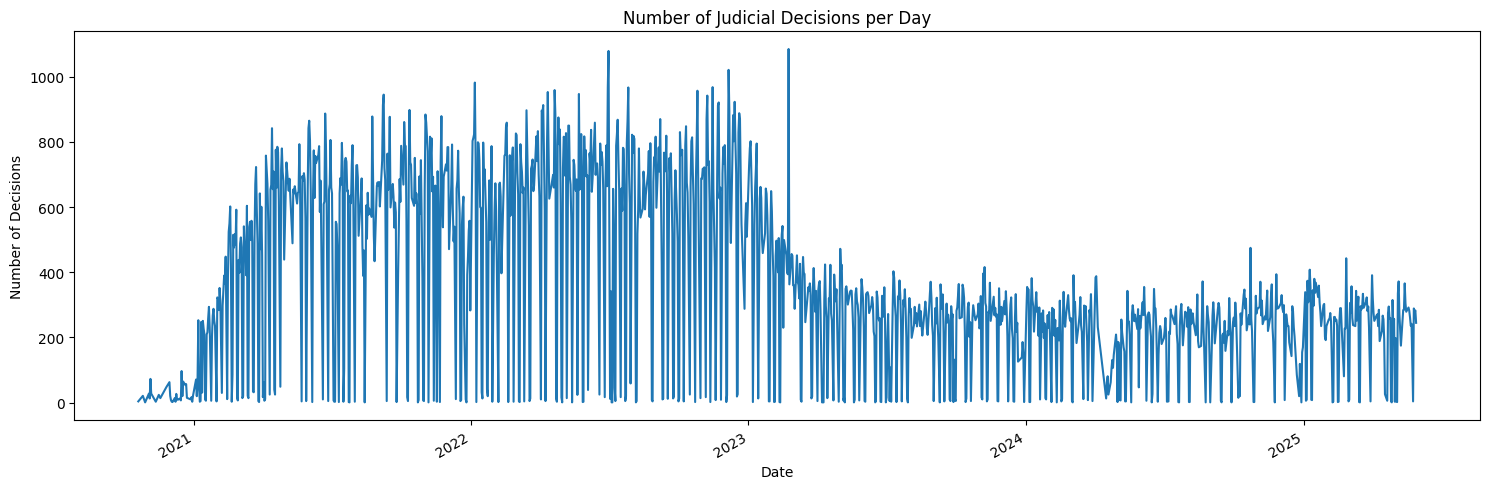

In [22]:
# Count decisions per day
daily_counts = df_decisions["datumZverejneni"].value_counts().sort_index()

# Plot
plt.figure(figsize=(15, 5))
daily_counts.plot()
plt.title("Number of Judicial Decisions per Day")
plt.xlabel("Date")
plt.ylabel("Number of Decisions")
plt.tight_layout()
plt.show()


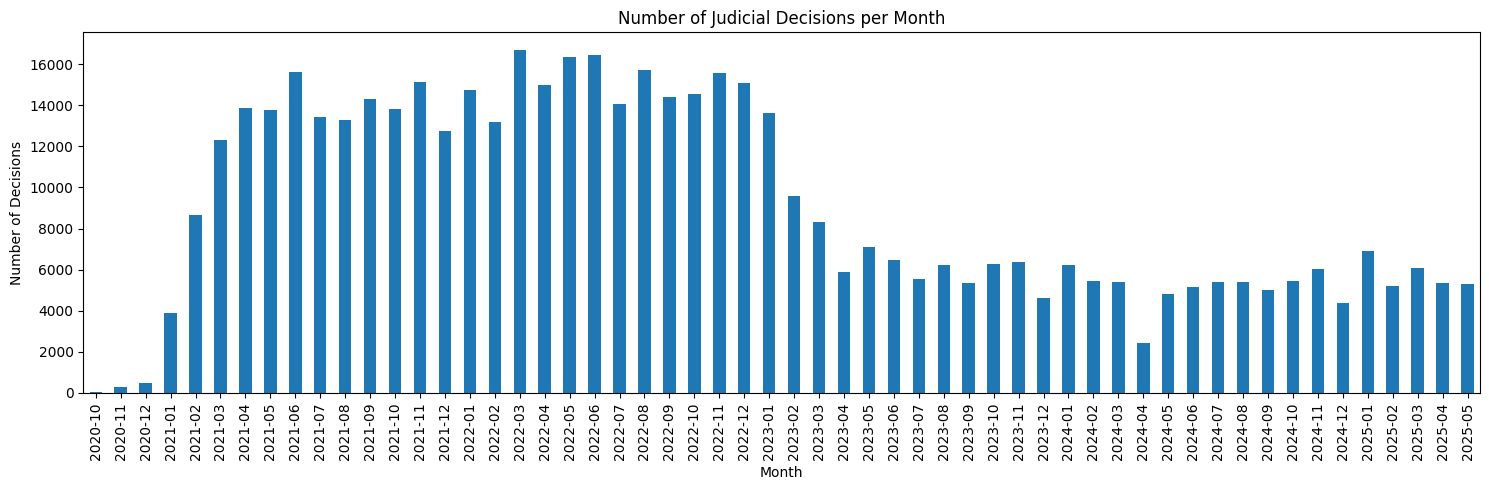

In [23]:
# Extract year-month from the publication date
df_decisions["month"] = df_decisions["datumZverejneni"].dt.to_period("M")

# Count decisions per month
monthly_counts = df_decisions["month"].value_counts().sort_index()

# Plot
monthly_counts.plot(kind="bar", figsize=(15, 5))
plt.title("Number of Judicial Decisions per Month")
plt.xlabel("Month")
plt.ylabel("Number of Decisions")
plt.tight_layout()
plt.show()
